Random Forest Regressor Performance:
  Mean Absolute Error (MAE): 67.11
  Mean Squared Error (MSE): 8875.39


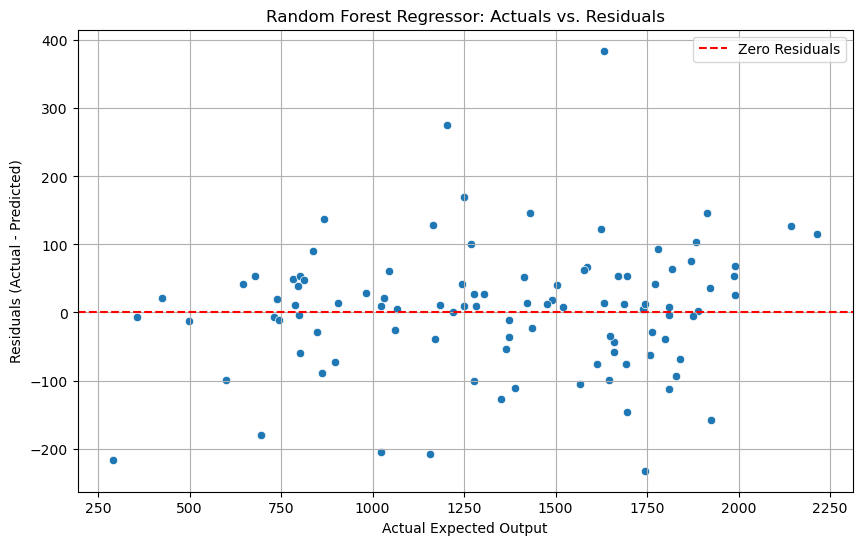

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and prepare the data (re-loading for self-contained example)
df = pd.read_json(r'C:\Users\james\Documents\GitHub\top-coder-challenge\public_cases.json', orient='records')
df_flattened_inputs = pd.json_normalize(df['input'])
df_final = pd.concat([df_flattened_inputs, df['expected_output']], axis=1)

# Define features (X) and target (y)
X = df_final[['trip_duration_days', 'miles_traveled', 'total_receipts_amount']]
y = df_final['expected_output']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Standardize features (optional for Random Forests, but good for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest Regressor model
# n_estimators: number of trees in the forest
# random_state for reproducibility
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = random_forest_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regressor Performance:")
print(f"  Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"  Mean Squared Error (MSE): {mse_rf:.2f}")

# Calculate residuals
residuals_rf = y_test - y_pred_rf

# Plot Actuals vs. Residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals_rf)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Residuals') # Add a horizontal line at y=0
plt.title('Random Forest Regressor: Actuals vs. Residuals')
plt.xlabel('Actual Expected Output')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.legend()
plt.show()

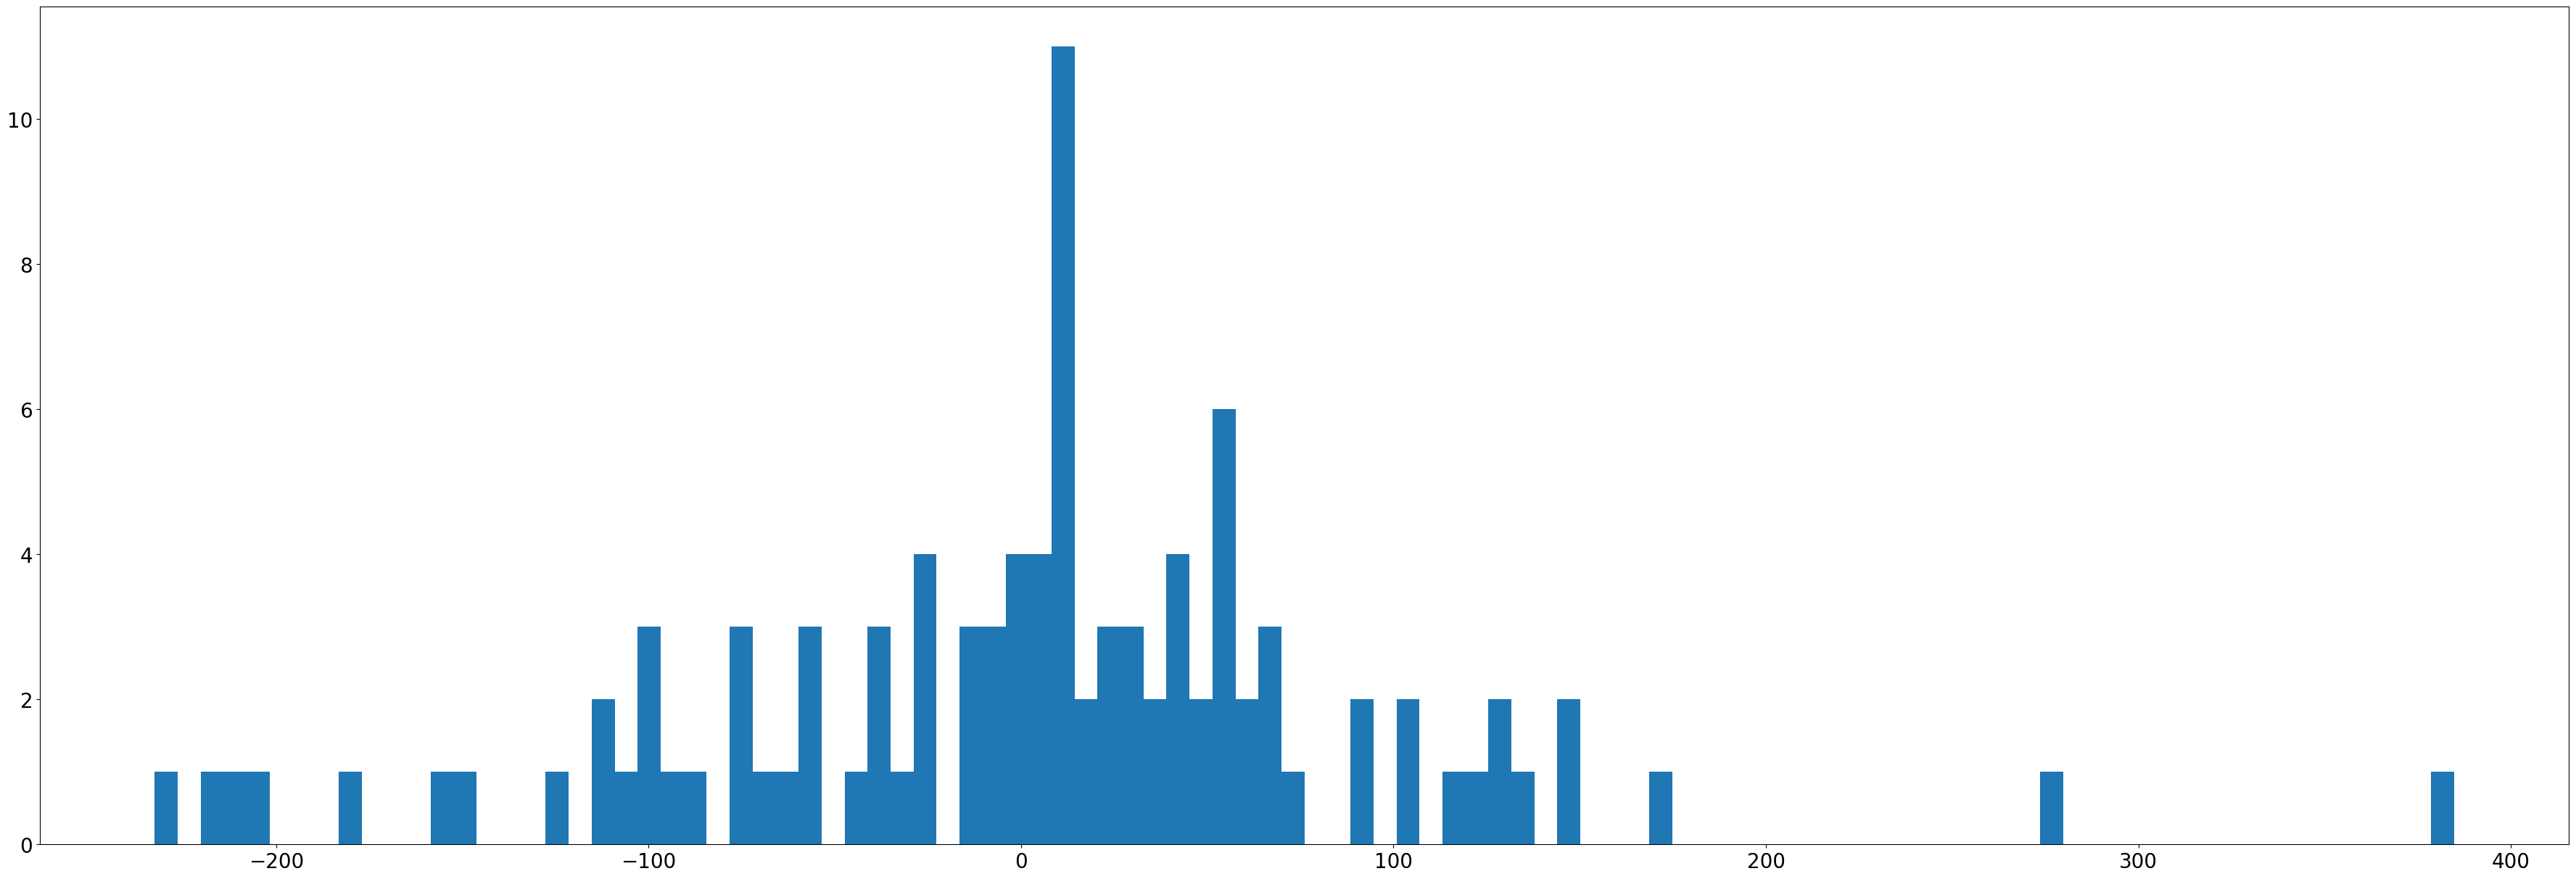

In [10]:
plt.figure(figsize=(45,15))
plt.hist(residuals_rf,bins=100)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

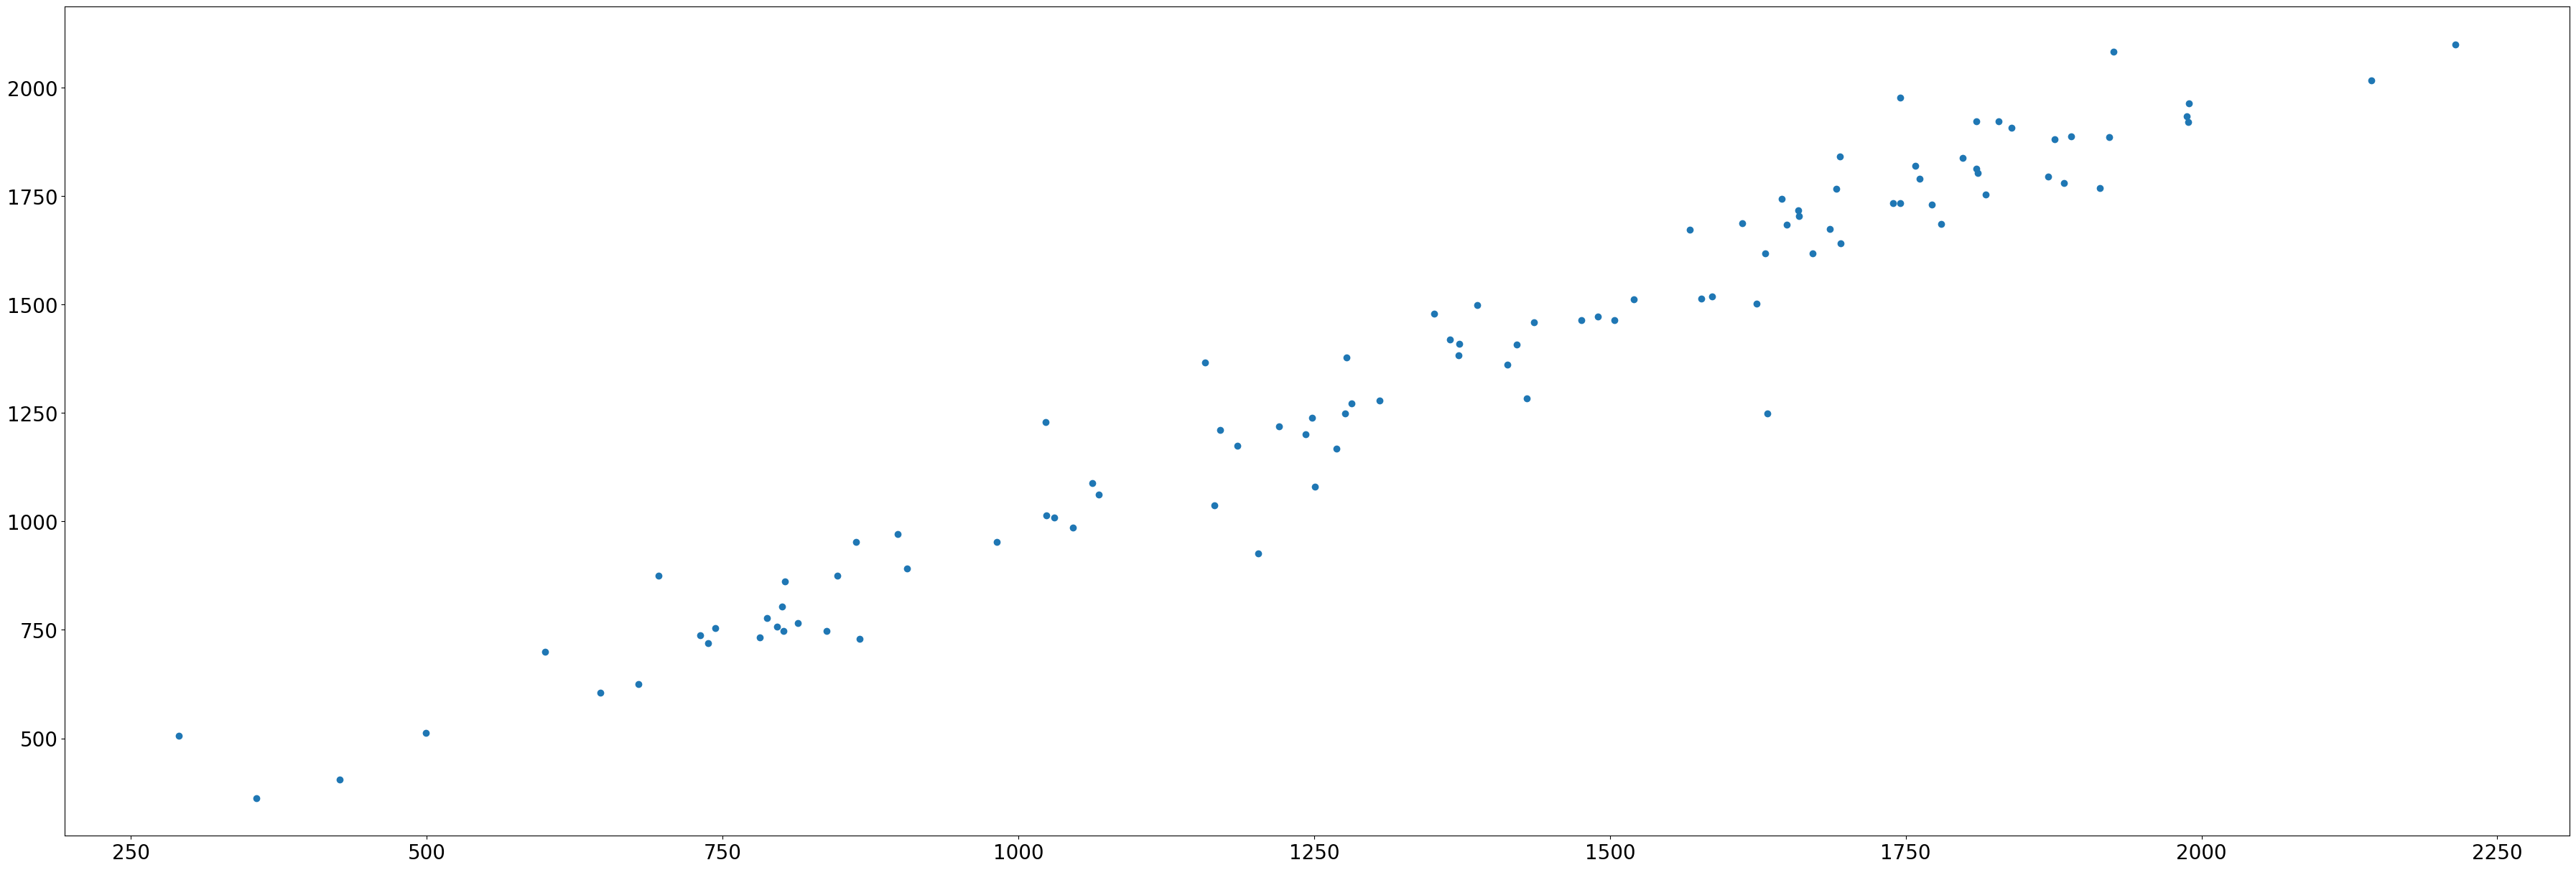

In [11]:
plt.figure(figsize=(45,15))
plt.scatter(y_test,y_pred_rf)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()